In [318]:
#pd.set_option('display.max_rows', None)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.style as style
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor


In [320]:
df = pd. read_excel(r"C:\Users\lily\Desktop\DS interview prep\Interviews\Mastercard\GreenTrail Store Data.xlsx")

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Store ID                               25 non-null     int64         
 1   Location                               25 non-null     object        
 2   Store Size                             25 non-null     int64         
 3   Store Type                             25 non-null     object        
 4   Promotion ID                           25 non-null     int64         
 5   Type of Promotion                      25 non-null     object        
 6   Promotion Start Date                   25 non-null     datetime64[ns]
 7   Promotion End Date                     25 non-null     datetime64[ns]
 8   Promotion duration                     25 non-null     int64         
 9   Weekly Sales During Promotion          25 non-null     int64       

In [324]:
df.head()

,Store ID,Location,Store Size,Store Type,Promotion ID,Type of Promotion,Promotion Start Date,Promotion End Date,Promotion duration,Weekly Sales During Promotion,Weekly Sales before-during,Weekly Sales Before Promotion,Weekly Sales After Promotion,Weekly Sales before-after,Average Daily Visits During Promotion,Average visit bef-dur,Average Daily Visits Before Promotion,Average Daily Visits After Promotion,Average Visit bef-aft
0,1,New York,2000,Urban,101,Discount,2023-06-01,2023-06-14,13,50000,20000,30000,35000,5000,400,100,300,350,50
1,8,San Diego,2000,Urban,108,Buy-One-Get-One,2023-06-22,2023-07-06,14,56000,13000,43000,39000,-4000,530,110,420,410,-10
2,16,Detroit,1900,Urban,116,Discount,2023-08-10,2023-08-24,14,58000,14000,44000,42000,-2000,540,110,430,420,-10
3,3,Chicago,1800,Urban,103,Special Event,2023-07-01,2023-07-14,13,60000,20000,40000,40000,0,500,150,350,450,100
4,6,Philadelphia,1800,Urban,106,Special Event,2023-08-05,2023-08-19,14,49000,18000,31000,41000,10000,480,180,300,400,100


In [352]:
df.groupby('Type of Promotion')['Weekly Sales before-after','Average Visit bef-aft'].sum().reset_index()

,Type of Promotion,Weekly Sales before-after,Average Visit bef-aft
0,Buy-One-Get-One,-6000,5
1,Discount,16000,200
2,Special Event,27000,370


In [354]:
df.groupby('Type of Promotion')['Weekly Sales before-after','Average Visit bef-aft'].mean().reset_index()

,Type of Promotion,Weekly Sales before-after,Average Visit bef-aft
0,Buy-One-Get-One,-750.000000,0.625000
1,Discount,1777.777778,22.222222
2,Special Event,3375.000000,46.250000


*Note:Special Event type of promotion made the biggest sales profit and brought highest number of the customers after the promotion period.*

In [358]:
df.groupby('Store Type')['Weekly Sales before-after','Average Visit bef-aft'].sum().reset_index()

,Store Type,Weekly Sales before-after,Average Visit bef-aft
0,Suburban,0,65
1,Urban,37000,510


In [356]:
df.groupby('Store Type')['Weekly Sales before-after','Average Visit bef-aft'].mean().reset_index()

,Store Type,Weekly Sales before-after,Average Visit bef-aft
0,Suburban,0.000000,5.416667
1,Urban,2846.153846,39.230769


In [367]:
df[['Store Type', 'Weekly Sales before-after', 'Average Visit bef-aft']].describe()

,Weekly Sales before-after,Average Visit bef-aft
count,25.000000,25.000000
mean,1480.000000,23.000000
std,3489.508084,32.818948
min,-5000.000000,-25.000000
25%,-1000.000000,10.000000
50%,2000.000000,20.000000
75%,3000.000000,30.000000
max,10000.000000,100.000000


*Note:Urban areas were able to make bigger profit and number of visitors after promotion than suburban.*

In [394]:
df.groupby(['Store Type', 'Type of Promotion'])[['Weekly Sales before-after', 'Average Visit bef-aft']].sum().reset_index()

,Store Type,Type of Promotion,Weekly Sales before-after,Average Visit bef-aft
0,Suburban,Buy-One-Get-One,-9000,-45
1,Suburban,Discount,2000,60
2,Suburban,Special Event,7000,50
3,Urban,Buy-One-Get-One,3000,50
4,Urban,Discount,14000,140
5,Urban,Special Event,20000,320


In [396]:
df.groupby(['Store Type', 'Type of Promotion'])[['Weekly Sales before-after', 'Average Visit bef-aft']].mean().reset_index()

,Store Type,Type of Promotion,Weekly Sales before-after,Average Visit bef-aft
0,Suburban,Buy-One-Get-One,-2250.000000,-11.250000
1,Suburban,Discount,400.000000,12.000000
2,Suburban,Special Event,2333.333333,16.666667
3,Urban,Buy-One-Get-One,750.000000,12.500000
4,Urban,Discount,3500.000000,35.000000
5,Urban,Special Event,4000.000000,64.000000


In [365]:
df.groupby('Promotion Start Date')['Weekly Sales before-after','Average Visit bef-aft'].sum().reset_index()

,Promotion Start Date,Weekly Sales before-after,Average Visit bef-aft
0,2023-04-10,1000,10
1,2023-04-15,8000,70
2,2023-04-20,5000,50
3,2023-04-30,3000,25
4,2023-05-05,-1000,-10
5,2023-05-10,2000,15
6,2023-05-15,-3000,-5
7,2023-05-25,4000,30
8,2023-06-01,5000,50
9,2023-06-10,1000,10


In [335]:
def categorize_day(date):
    day = date.day
    if 1 <= day <= 10:
        return 'begmonth'
    elif 11 <= day <= 20:
        return 'midmonth'
    else:
        return 'endmonth'

df['category'] = df['Promotion Start Date'].apply(categorize_day)

In [339]:
df.groupby('category')['Weekly Sales before-after','Average Visit bef-aft'].sum().reset_index()

,category,Weekly Sales before-after,Average Visit bef-aft
0,begmonth,13000,245
1,endmonth,3000,45
2,midmonth,21000,285


In [341]:
df.groupby('category')['Weekly Sales before-after','Average Visit bef-aft'].mean().reset_index()

,category,Weekly Sales before-after,Average Visit bef-aft
0,begmonth,1444.444444,27.222222
1,endmonth,1000.000000,15.000000
2,midmonth,1615.384615,21.923077


*Note: The biggest sale and average visit is usually in modmonth period - never endmonth.*

In [344]:
df.groupby('Store Type')['Weekly Sales before-after','Average Visit bef-aft'].mean().reset_index()

,Store Type,Weekly Sales before-after,Average Visit bef-aft
0,Suburban,0.000000,5.416667
1,Urban,2846.153846,39.230769


*Note: Urban areas were more successful in terms of the sales and number of visits.*

In [347]:
df.groupby('Store Type')['Weekly Sales before-after','Average Visit bef-aft'].sum().reset_index()

,Store Type,Weekly Sales before-after,Average Visit bef-aft
0,Suburban,0,65
1,Urban,37000,510


#### Target variable

In [350]:
df['Weekly Sales before-after'].skew()

0.3479134575989611

<Axes: xlabel='Weekly Sales before-after', ylabel='Count'>

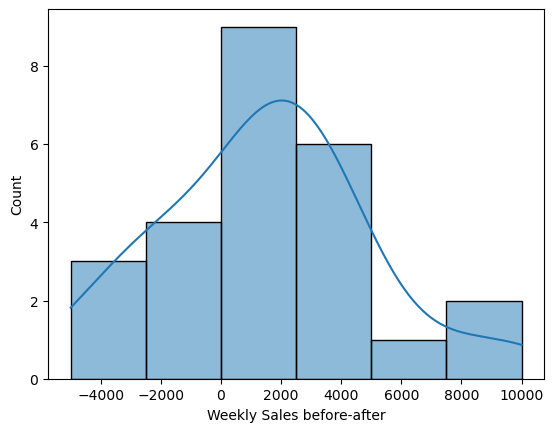

In [233]:
sns.histplot(x=df['Weekly Sales before-after'], kde=True)

In [234]:
corr = abs(df.corr()['Weekly Sales before-after']).sort_values(ascending=False)
corr

Weekly Sales before-after                1.000000
Average Visit bef-aft                    0.778235
Average Daily Visits Before Promotion    0.619579
Average visit  bef-dur                   0.614803
Weekly Sales Before Promotion            0.539647
Weekly Sales before-during               0.536183
Weekly Sales After Promotion             0.410848
Store Size                               0.164940
Promotion duration                       0.159849
Average Daily Visits After Promotion     0.106564
Average Daily Visits During Promotion    0.102737
Weekly Sales During Promotion            0.085829
Promotion ID                             0.048672
Store ID                                 0.048672
Name: Weekly Sales before-after, dtype: float64

### Data Preparation for modelling

In [236]:
df['Promotion Month'] = df['Promotion Start Date'].dt.month

Encoding

In [238]:
df2 = pd.get_dummies(df,columns=['Store Type','Type of Promotion', 'category'],drop_first = True)

In [239]:
df2.head()

,Store ID,Location,Store Size,Promotion ID,Promotion Start Date,Promotion End Date,Promotion duration,Weekly Sales During Promotion,Weekly Sales before-during,Weekly Sales Before Promotion,...,Average visit bef-dur,Average Daily Visits Before Promotion,Average Daily Visits After Promotion,Average Visit bef-aft,Promotion Month,Store Type_Urban,Type of Promotion_Discount,Type of Promotion_Special Event,category_endmonth,category_midmonth
0,1,New York,2000,101,2023-06-01,2023-06-14,13,50000,20000,30000,...,100,300,350,50,6,1,1,0,0,0
1,8,San Diego,2000,108,2023-06-22,2023-07-06,14,56000,13000,43000,...,110,420,410,-10,6,1,0,0,1,0
2,16,Detroit,1900,116,2023-08-10,2023-08-24,14,58000,14000,44000,...,110,430,420,-10,8,1,1,0,0,0
3,3,Chicago,1800,103,2023-07-01,2023-07-14,13,60000,20000,40000,...,150,350,450,100,7,1,0,1,0,0
4,6,Philadelphia,1800,106,2023-08-05,2023-08-19,14,49000,18000,31000,...,180,300,400,100,8,1,0,1,0,0


Modeling - poor results are expected due to small amount of data, however below is the showcase of the possible next steps in case of real-world data

In [241]:
X = df.drop(['Weekly Sales before-after','Store ID', 'Location', 'Store Size','Promotion ID','Store Type','Type of Promotion', 'Promotion Start Date', 'Promotion End Date', 'category'], axis=1)
y = df['Weekly Sales before-after']

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [243]:
mmscaler = MinMaxScaler()
X_trains = mmscaler.fit_transform(X_train)

Linear Regression

In [271]:
lr = LinearRegression().fit(X_trains, y_train)

y_train_pred_lr = lr.predict(X_trains)  
y_test_pred_lr = lr.predict(X_test)

r2_train_lr = r2_score(y_train, y_train_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)

# mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
# mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)

# rmse_train_lr = np.sqrt(mse_train_lr)
# rmse_test_lr = np.sqrt(mse_test_lr)

In [273]:
print(f"Training R² Score: {r2_train_lr:.4f}")
print(f"Testing R² Score: {r2_test_lr:.4f}")
# print(f"Training MSE: {mse_train_lr:.2f}")
# print(f"Testing MSE: {mse_test_lr:.2f}")
# print(f"Training RMSE: {rmse_train_lr:.2f}")
# print(f"Testing RMSE: {rmse_test_lr:.2f}")

Training R² Score: 1.0000
Testing R² Score: -343590149.8936
Training MSE: 0.00
Testing MSE: 4305394952013131.00
Training RMSE: 0.00
Testing RMSE: 65615508.47


Random Forest

In [276]:
rf = RandomForestRegressor(n_estimators=50,random_state=42)

In [278]:
y_train_pred_rf= lr.predict(X_train)  
y_test_pred_rf = lr.predict(X_test)

r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

In [280]:
print(f"Training R² Score: {r2_train_rf:.4f}")
print(f"Testing R² Score: {r2_test_rf:.4f}")

Training R² Score: -357269886.9212
Testing R² Score: -343590149.8936


Observations: 
- Special Event type of promotion made the biggest sales profit and brought highest number of the customers after the promotion period.
- Urban areas were able to make bigger profit and number of visitors after promotion than suburban.
- The biggest sale and average visit is usually in modmonth period - never endmonth.


Recommendation: 
- Keeping the promotion for 2 weeks, midmonth
- Control group to be in urban area and period of starting from september to march (excluding nov -dec)
- Control group - adding new stores from urban areas


Rationale for additional data inclusion: age, gender, income level, family status, loyality, local unemployment rates, regional average houshold income, weather, public holidays, local events, school holiday, tourism data, other type of advertising campaings, social media sentiment, foot traffic data, online traffic data